<a href="https://colab.research.google.com/github/jpengtelecom/Vetor-de-poynting-Normalizado/blob/main/Vetor_de_poynting_Normalizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy
!pip install matplotlib

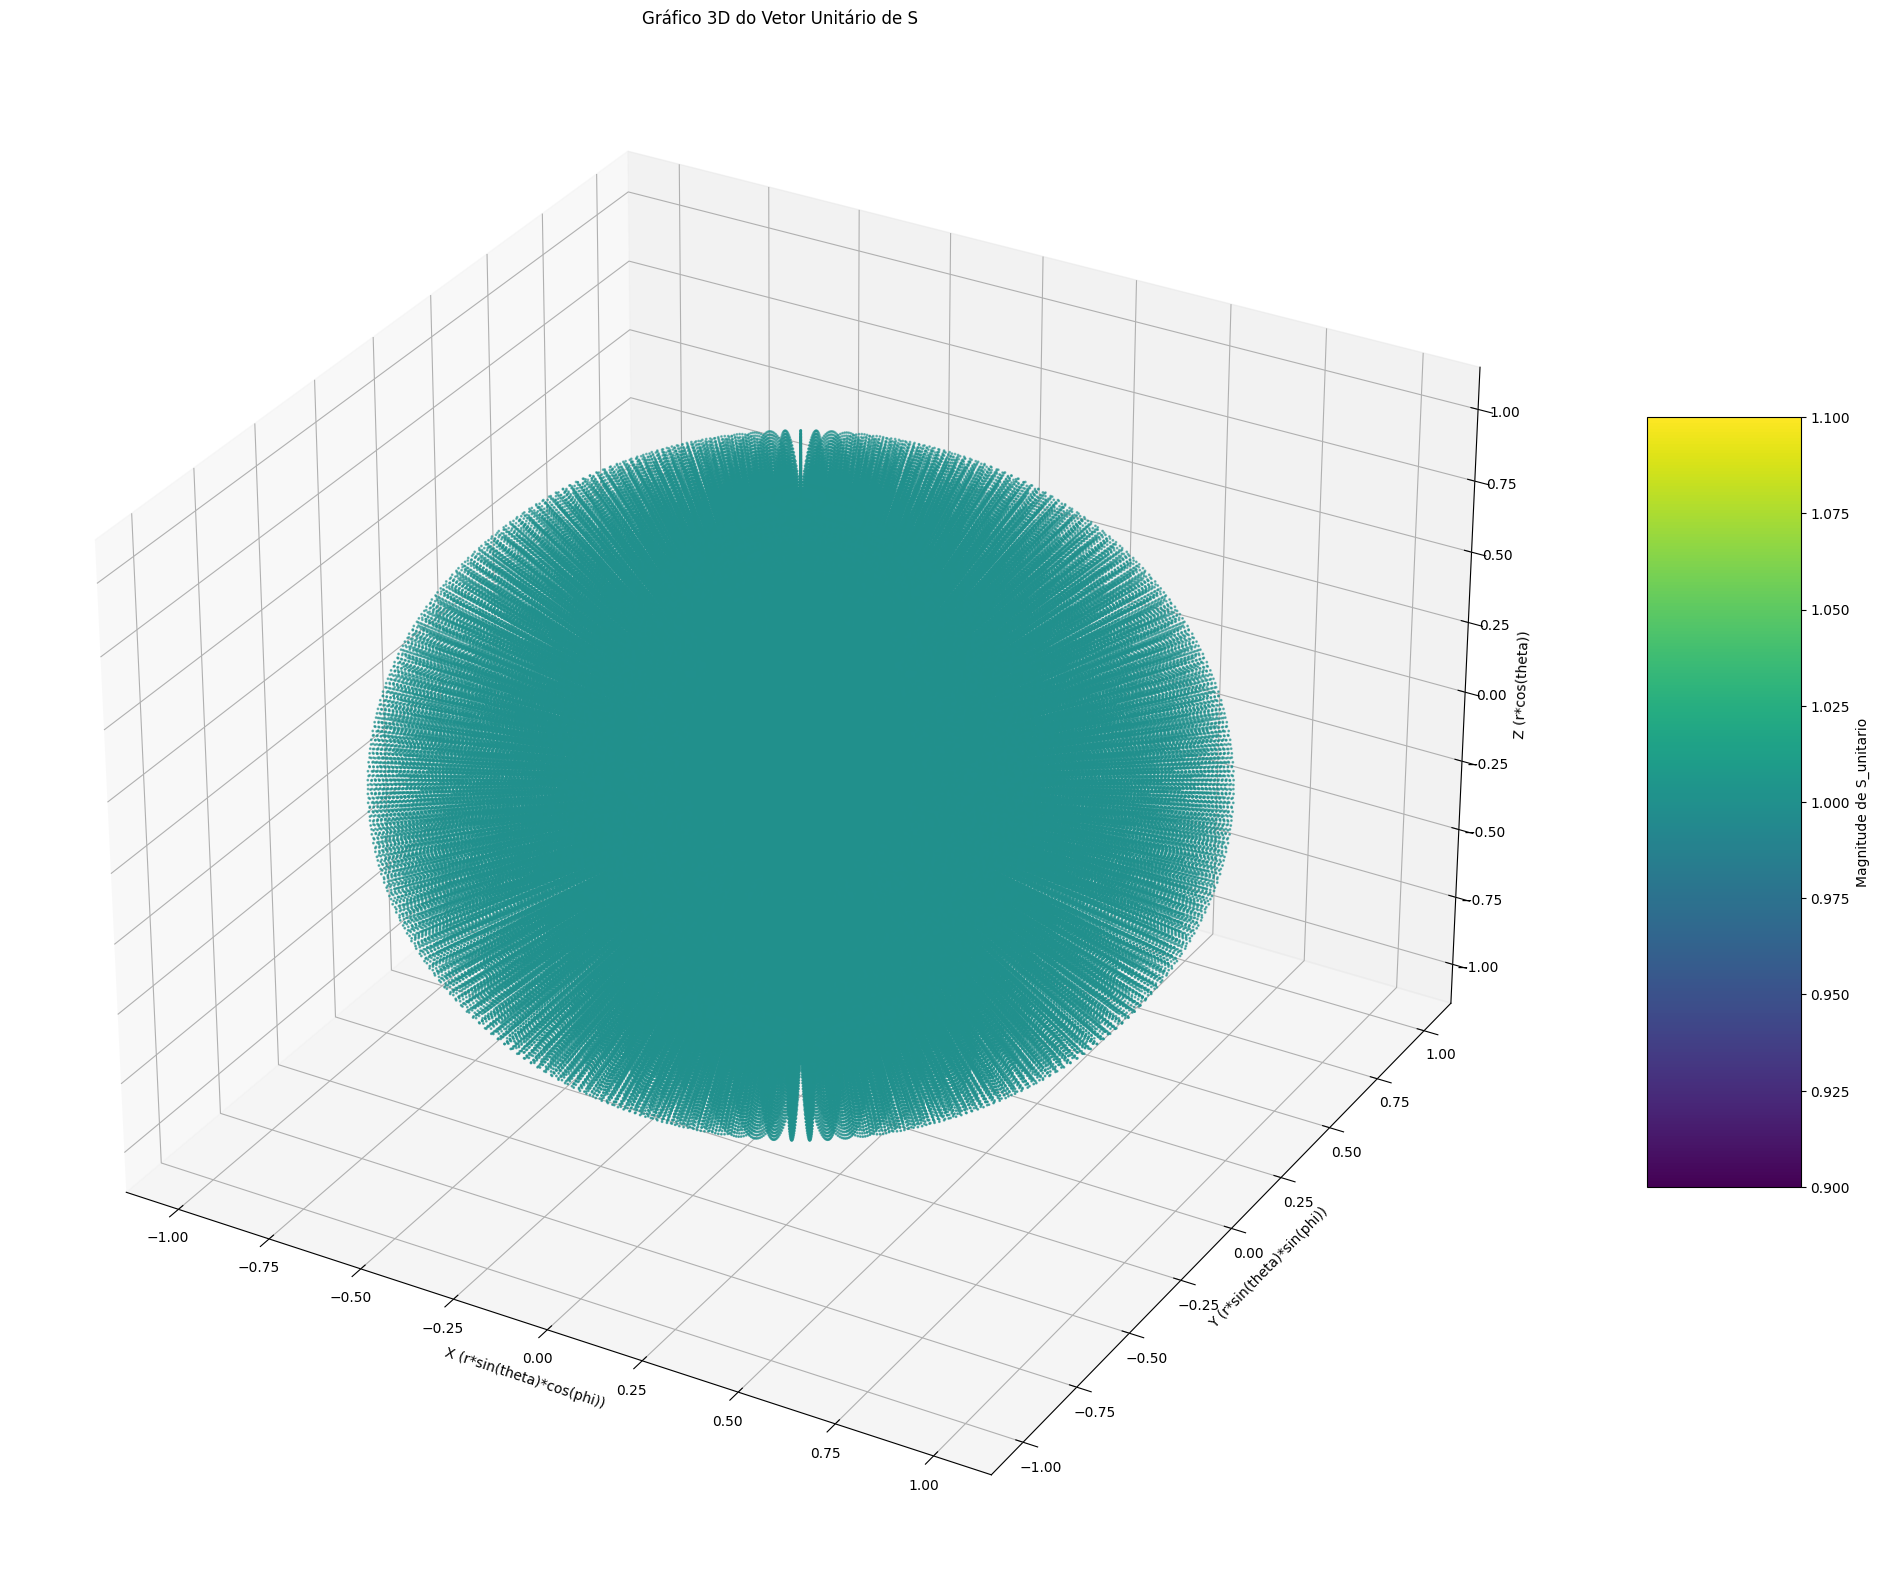

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parâmetros físicos
mi0 = 4 * np.pi * 10**(-7)
e0 = 8.85 * 10**(-12)
n = np.sqrt(mi0 / e0)
Ie = 1
l = 0.01
f = 10**15
omega = 2 * np.pi * f
k = omega * np.sqrt(mi0 * e0)

# Definir os valores de r, theta e phi
r = np.linspace(0.1, 1, 100)  # Valores de r
theta = np.linspace(0, np.pi, 100)  # Valores de theta
phi = np.linspace(0, 2*np.pi, 100)  # Valores de phi

# Criar a malha
r_mesh, theta_mesh, phi_mesh = np.meshgrid(r, theta, phi, indexing='ij')

# Definir os componentes S_r e S_theta
S_r = (1j * n * k * Ie**2 * l**2 * np.sin(theta_mesh)) / (16 * np.pi**2) * (
    1 + 1 / (1j * k * r_mesh) - 1 / (k**2 * r_mesh**2)) * np.exp(-2j * k * r_mesh)

S_theta = (1j * n * Ie**2 * l**2 * np.cos(theta_mesh)) / (8 * np.pi**2 * r_mesh**2) * (
    1 + 1 / (1j * k * r_mesh)) * np.exp(-2j * k * r_mesh)

# Soma dos componentes
S = S_r + S_theta

# Vetor unitário de S
S_unitario = S / np.abs(S)

# Calcular a magnitude para a cor
S_magnitude = np.abs(S_unitario)

# Converter coordenadas esféricas para coordenadas cartesianas
X = r_mesh * np.sin(theta_mesh) * np.cos(phi_mesh)
Y = r_mesh * np.sin(theta_mesh) * np.sin(phi_mesh)
Z = r_mesh * np.cos(theta_mesh)

# Criar o gráfico 3D
fig = plt.figure(figsize=(25, 20))
ax = fig.add_subplot(111, projection='3d')

# Plotar a dispersão dos vetores
sc = ax.scatter(X, Y, Z, c=S_magnitude, cmap='viridis', s=1)

# Adicionar barra de cores
cbar = plt.colorbar(sc, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Magnitude de S_unitario')

# Configurações de labels e título
ax.set_xlabel('X (r*sin(theta)*cos(phi))')
ax.set_ylabel('Y (r*sin(theta)*sin(phi))')
ax.set_zlabel('Z (r*cos(theta))')
ax.set_title('Gráfico 3D do Vetor Unitário de S')

plt.show()
